In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Description

This 1-D diffusion problem starts with a linear profile in x of slope -1.

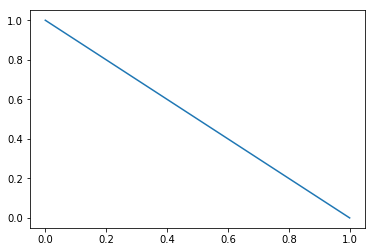

In [3]:
g0f = lambda x: 1 - x
x = np.linspace(0, 1, 101)
plt.plot(x, g0f(x));

With this starting profile, the value at the $x=0$ boundary is then linearly decreased from $1$ to $0$ in unit time.

## Create the training data.

In [4]:
nx = nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt),np.repeat(tt, nx))))
n = len(x_train)

## Read the differential equation and create the neural net.

In [5]:
deq = PDE2DIFF1D('diff1d_decrease')

In [6]:
net = NNPDE2DIFF1D(deq)

## Train the neural net.

In [7]:
%timeit -n 1 -r 1 net.train(x_train, trainalg='L-BFGS-B')

Calling self.train_minimize().
16.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
print(net)

NNPDEDIFF1D:
w = [[-0.29541586 -0.11243814 -0.19531237 -0.83400953  0.39888471 -0.89637621
   0.53229572 -0.96773518  0.64776126  0.97957519]
 [-0.62751901 -0.45690929  0.16374519 -0.40494951 -0.73429635  0.25806214
  -0.3132669  -0.14535796 -0.67404986  0.23654621]]
u = [-1.11626366  0.36452373 -0.17120716  0.26475954  0.56081786 -0.46234115
 -0.85562404  0.86259077  0.53693866 -0.32172331]
v = [-0.10550517  1.4906235  -0.18372193  1.02570715  0.86990909 -0.98800681
  0.06240087  0.08280594 -0.30387102 -1.15400958]



## Compute the trained solution.

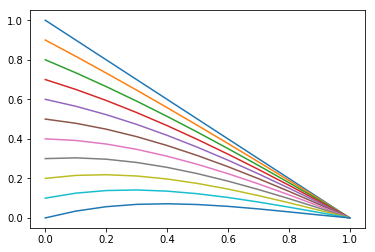

In [9]:
Yt = net.run(x_train).reshape(nx, nt)
for i in range(nt):
    plt.plot(xt, Yt[i])

## Compute the analytical solution.

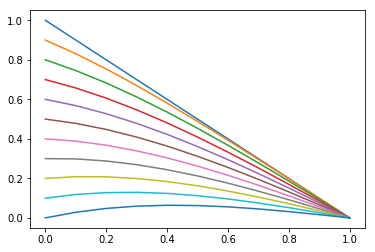

In [10]:
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = deq.Yaf(x_train[i])
Ya = Ya.reshape((nx, nt))
for i in range(nt):
    plt.plot(xt, Ya[i])

## Compute the error.

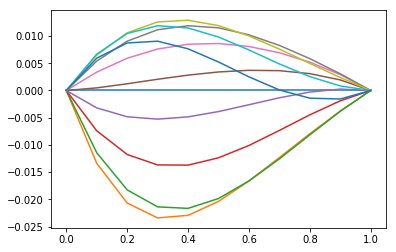

In [11]:
Y_err = Yt - Ya
for i in range(nt):
    plt.plot(xt, Y_err[i])